In [93]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn import model_selection
import pickle
from node2vec import Node2Vec

In [94]:
from codes.data import Data
from codes.kpmf import KPMF
from codes.ckpmf import CKPMF
from codes.algorithm_base import AlgorithmBase
from codes.grid_search import grid_search
import codes.kernels

In [37]:
# Učitavanje podataka o korisnicima i izvođačima.
df_user_artists1 = pd.read_excel('baza/user_artists.xlsx')
# Izdvajamo 1000 najslušanijih izvođača.
artistID, rate_frequency = np.unique(df_user_artists1['artistID'], return_counts=True)
artist_rate_frequency = pd.DataFrame({'artistID': artistID, 'rate_frequency': rate_frequency})
artist_rate_frequency.sort_values(by='rate_frequency', ascending=False, inplace=True)
most_frequent_artists = artist_rate_frequency[:1000]
df_user_artists = df_user_artists1[df_user_artists1['artistID'].isin(most_frequent_artists['artistID'])]

#Učitavanje podataka o društvenoj mreži korisnika.
df_user_friends = pd.read_excel('baza/user_friends.xlsx')

#Učitavanje podataka o tagovima (žanrovima muzike) koje su korisnici dodijelili izvođačima.
df_user_tagged_artists = pd.read_excel('baza/user_tagged_artists.xlsx')

In [38]:
# Podjela skupa podataka na trening/validacioni/test skup.
df_user_artists_train_val, df_user_artists_test = model_selection.train_test_split(df_user_artists, test_size=0.2, \
                                                                                   random_state=7)
df_user_artists_train, df_user_artists_val = model_selection.train_test_split(df_user_artists_train_val, \
                                                                              test_size=0.2, random_state=7)

In [73]:
# Grid search za različita jezgra.
# Inicijalno je čitav projekat rađen u PyCharmu i tamo je pokrenut grid_search i generisani su rezultati, odnosno
# određeni su optimalni parametri.
# Obzirom da je to jako dugo trajalo (par dana) nismo ponovo pokretale sve u jupyter svesci, već smo samo iskoristile 
# rezultate dobijene iz PyCharma
# Npr. za CT kernel metode KPMF povratna vrijednost poziva funkcije grid search je bila sledeća:
# best lr: 0.005, best reg: 0.05, best n_factors: 8

# result_ct = grid_search(KPMF, df_user_artists_train, df_user_artists_val, df_user_friends, \
#                         df_user_tagged_artists, params={'kernel': 'ct'})
# result_reg = grid_search(KPMF, df_user_artists_train, df_user_artists_val, df_user_friends, \
#                          df_user_tagged_artists, params={'kernel': 'reg'})
# result_dif = grid_search(KPMF, df_user_artists_train, df_user_artists_val, df_user_friends, \
#                          df_user_tagged_artists, params={'kernel': 'dif'})
# result_rbf = grid_search(KPMF, df_user_artists_train, df_user_artists_val, df_user_friends, \
#                          df_user_tagged_artists, params={'kernel': 'rbf'})
# result_ckpmf = grid_search(CKPMF, df_user_artists_train, df_user_artists_val, df_user_friends, \
#                            df_user_tagged_artists, params={'kernel': 'ckpmf'}

In [40]:
# Funkcija za cuvanje modela.
def save_model(model, file_name):
    pickle.dump(model, open(file_name, 'wb'))

### Obučavanje KPMF modela

In [41]:
# KPMF modeli 
kpmf_model_ct = KPMF(n_epochs=40, n_factors = 8, learning_rate=0.005, regularization=0.05,kernel='ct')

In [42]:
kpmf_model_ct.fit(df_user_artists_train, df_user_artists_val, df_user_friends, df_user_tagged_artists)

Obrada podataka...
Inicijalizacija u i v...
Ucenje...
Epoha 1:
train loss: 5.749321988051649; val loss:5.804866680796854
Epoha 2:
train loss: 5.27045851013901; val loss:5.422196011153267
Epoha 3:
train loss: 4.519240660343274; val loss:4.772029643319724
Epoha 4:
train loss: 3.677651691800591; val loss:4.049168208367829
Epoha 5:
train loss: 2.879941152684235; val loss:3.3199094155060815
Epoha 6:
train loss: 2.26809777878796; val loss:2.7310498590272254
Epoha 7:
train loss: 1.8335217522330696; val loss:2.2972935185699974
Epoha 8:
train loss: 1.5349828151732714; val loss:1.9892749542768324
Epoha 9:
train loss: 1.3337222339057584; val loss:1.7732486504971752
Epoha 10:
train loss: 1.1988689616110577; val loss:1.6213480412767725
Epoha 11:
train loss: 1.1079525041343552; val loss:1.5132023377682389
Epoha 12:
train loss: 1.0454927359916886; val loss:1.4346160844058427
Epoha 13:
train loss: 1.0013210486692066; val loss:1.376010429085585
Epoha 14:
train loss: 0.9689863065091675; val loss:1.33106

In [50]:
kpmf_model_reg = KPMF(n_epochs=20, n_factors=8, learning_rate=0.01, regularization=0.001, kernel='reg')

In [51]:
kpmf_model_reg.fit(df_user_artists_train, df_user_artists_val, df_user_friends, df_user_tagged_artists)

Obrada podataka...
Inicijalizacija u i v...
Ucenje...
Epoha 1:
train loss: 5.0065314537750405; val loss:5.183708614242981
Epoha 2:
train loss: 3.275881228192744; val loss:3.6910016100272385
Epoha 3:
train loss: 1.9633884816788139; val loss:2.462383044093801
Epoha 4:
train loss: 1.3496179911157944; val loss:1.8585188325853175
Epoha 5:
train loss: 1.083147219739676; val loss:1.5721810823109124
Epoha 6:
train loss: 0.962876816143505; val loss:1.428262377497886
Epoha 7:
train loss: 0.9013575883195879; val loss:1.3482003222958832
Epoha 8:
train loss: 0.8643755599680476; val loss:1.2985916452613793
Epoha 9:
train loss: 0.8387705850068542; val loss:1.2650563880055254
Epoha 10:
train loss: 0.8191134989622111; val loss:1.2409672174316049
Epoha 11:
train loss: 0.8029156437766832; val loss:1.222979994378115
Epoha 12:
train loss: 0.7889148726967363; val loss:1.209244748988991
Epoha 13:
train loss: 0.7764179861458356; val loss:1.1986469641446797
Epoha 14:
train loss: 0.7650228313588461; val loss:1.

In [45]:
kpmf_model_dif = KPMF(n_epochs=20, n_factors=8, learning_rate=0.005, regularization=0.01, kernel='dif')

In [47]:
kpmf_model_dif.fit(df_user_artists_train, df_user_artists_val, df_user_friends, df_user_tagged_artists)

Obrada podataka...
Inicijalizacija u i v...
Ucenje...
Epoha 1:
train loss: 2.034656779099807; val loss:2.1453853231795676
Epoha 2:
train loss: 1.4517505308321745; val loss:1.5749949762083761
Epoha 3:
train loss: 1.1968432648877851; val loss:1.3238002512126918
Epoha 4:
train loss: 1.060908378215046; val loss:1.1897959673852347
Epoha 5:
train loss: 0.9807841816475248; val loss:1.1112648807492331
Epoha 6:
train loss: 0.9305300334814798; val loss:1.0625910517717667
Epoha 7:
train loss: 0.8974906797472666; val loss:1.031195948974516
Epoha 8:
train loss: 0.8748542741416929; val loss:1.010277877131045
Epoha 9:
train loss: 0.8587402642932661; val loss:0.9959445242167072
Epoha 10:
train loss: 0.8468514001249089; val loss:0.9858812403232851
Epoha 11:
train loss: 0.8377841191795884; val loss:0.9786682683632139
Epoha 12:
train loss: 0.8306556597155235; val loss:0.9734101863692216
Epoha 13:
train loss: 0.8248952797756708; val loss:0.969527346173675
Epoha 14:
train loss: 0.8201241245116528; val loss

In [54]:
kpmf_model_rbf = KPMF(n_epochs=10, n_factors=8, learning_rate=0.01, regularization=0.01, kernel='rbf')

In [56]:
kpmf_model_rbf.fit(df_user_artists_train, df_user_artists_val, df_user_friends, df_user_tagged_artists)

Obrada podataka...
Inicijalizacija u i v...


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


Ucenje...
Epoha 1:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


train loss: 1.783713707621516; val loss:1.9144220039144408
Epoha 2:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


train loss: 1.0906790279225747; val loss:1.231043181424569
Epoha 3:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:54<00:00,  1.84it/s]


train loss: 0.9198251363562284; val loss:1.050711576303737
Epoha 4:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


train loss: 0.8662270678715072; val loss:0.9942187169252921
Epoha 5:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:43<00:00,  2.27it/s]


train loss: 0.8421846498504625; val loss:0.9719346427737043
Epoha 6:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


train loss: 0.8280632433056112; val loss:0.9608986441485207
Epoha 7:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:43<00:00,  2.29it/s]


train loss: 0.8174871240301366; val loss:0.955232471959957
Epoha 8:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


train loss: 0.8094937358779164; val loss:0.9522911388924835
Epoha 9:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:42<00:00,  2.33it/s]


train loss: 0.8017641045134678; val loss:0.9492556058405064
Epoha 10:


Computing transition probabilities:   0%|          | 0/1860 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:44<00:00,  2.23it/s]


train loss: 0.7949098866988585; val loss:0.9480877303969146


In [90]:
# Čuvanje modela
save_model(kpmf_model_ct, 'models/kpmf_final_ct.sav')
save_model(kpmf_model_reg, 'models/kpmf_final_reg.sav')
save_model(kpmf_model_dif, 'models/kpmf_final_dif.sav')
save_model(kpmf_model_rbf, 'models/kpmf_final_rbf.sav')

### Grafički i tabelarni prikaz rezultata za metodu KPMF

In [58]:
# Sledeća funkcija se koristi za iscrtavanje grafika funkcije gubitka nakon treniranja na trening i validacionom skupu
# u zavisnosti od izabranog kernela u metodi KPMF
def plot_graphs(models, n_epochs, kernels):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(13, 12)
    i = 0
    for row in range(2):
        for col in range(2):
            ax[row, col].plot(range(0, n_epochs[i]), models[i].train_loss_per_epoch, color='royalblue', label='training')
            ax[row, col].plot(range(0, n_epochs[i]), models[i].val_loss_per_epoch, color='pink', label='validation')
            ax[row, col].set_xlabel('epoch')
            ax[row, col].set_ylabel('rmse')
            ax[row, col].legend(loc = 'best')
            ax[row, col].set_title(kernels[i])
            i +=1
            plt.show
    plt.suptitle('Kretanje funkcije gubitka na trening skupu i validacionom skupu', fontsize=20)

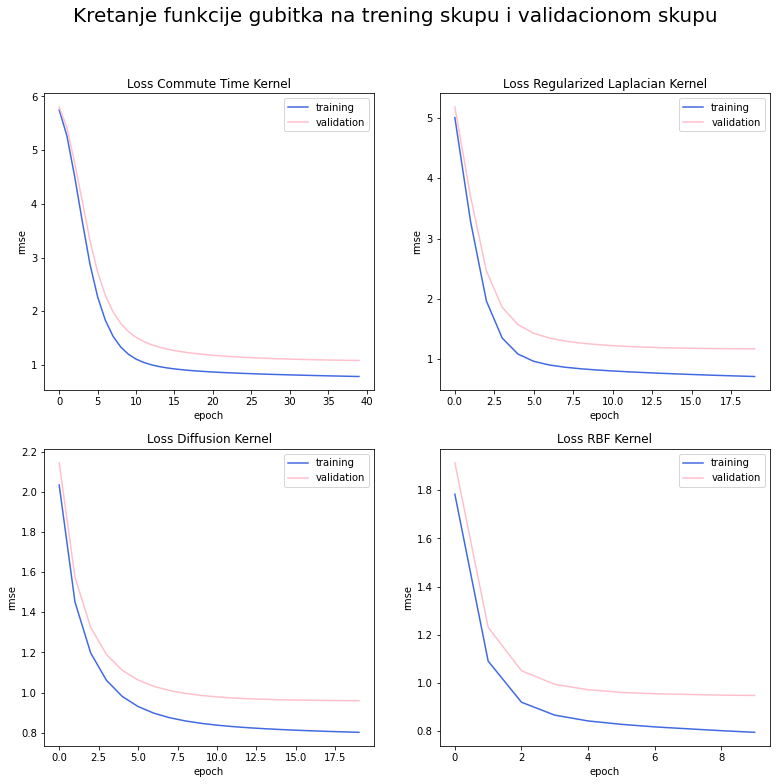

In [59]:
models = [kpmf_model_ct, kpmf_model_reg, kpmf_model_dif, kpmf_model_rbf]
n_epochs = [kpmf_model_ct.n_epochs, kpmf_model_reg.n_epochs, kpmf_model_dif.n_epochs, kpmf_model_rbf.n_epochs]
kernels = ['Loss Commute Time Kernel', 'Loss Regularized Laplacian Kernel', 'Loss Diffusion Kernel', 'Loss RBF Kernel']
plot_graphs(models, n_epochs, kernels)

In [60]:
# Predikcije KPMF modela i greška na test skupu.
df_pred_kpmf_ct, pred_loss_kpmf_ct = kpmf_model_ct.predict(df_user_artists_test)
df_pred_kpmf_reg, pred_loss_kpmf_reg = kpmf_model_reg.predict(df_user_artists_test)
df_pred_kpmf_dif, pred_loss_kpmf_dif = kpmf_model_dif.predict(df_user_artists_test)
df_pred_kpmf_rbf, pred_loss_kpmf_rbf = kpmf_model_rbf.predict(df_user_artists_test)

Prikazujemo prvih 10 rejtinga i predikcija rejtinga za par korisnik/izvođač za svaki od obučenih modela sa različitim jezgrima. 

In [61]:
df_pred_kpmf_ct.drop(columns=['weight'])[1:10].style.set_caption("Predikcije KPMF modela sa kernelom prosječnog vremena obilaska (CT kernel)")

,userID,artistID,rating,prediction
73070,1649,1034,6.792344,6.720080
51603,1149,193,2.708050,2.721446
64800,1459,604,5.010635,4.014862
12626,274,1072,5.214936,5.017971
5776,122,1244,2.708050,2.683962
80975,1829,67,5.869297,8.013516
64779,1458,2544,3.178054,2.974482
70429,1587,53,6.357842,6.729701
49392,1098,57,3.871201,2.595818


In [62]:
df_pred_kpmf_reg.drop(columns=['weight'])[1:10].style.set_caption("Predikcije KPMF modela sa regularizacionim Laplasovim jezgrom")

,userID,artistID,rating,prediction
73070,1649,1034,6.792344,7.006151
51603,1149,193,2.708050,2.957535
64800,1459,604,5.010635,3.136722
12626,274,1072,5.214936,4.376582
5776,122,1244,2.708050,1.735867
80975,1829,67,5.869297,7.186669
64779,1458,2544,3.178054,3.339315
70429,1587,53,6.357842,5.859842
49392,1098,57,3.871201,2.561102


In [63]:
df_pred_kpmf_dif.drop(columns=['weight'])[1:10].style.set_caption("Predikcije KPMF modela sa difuzionim kernelom")

,userID,artistID,rating,prediction
73070,1649,1034,6.792344,7.208949
51603,1149,193,2.708050,3.183043
64800,1459,604,5.010635,4.707613
12626,274,1072,5.214936,6.129938
5776,122,1244,2.708050,3.578441
80975,1829,67,5.869297,7.478610
64779,1458,2544,3.178054,2.995024
70429,1587,53,6.357842,6.635634
49392,1098,57,3.871201,2.927265


In [64]:
df_pred_kpmf_rbf.drop(columns = ['weight'])[1:10].style.set_caption("Predikcije KPMF modela sa RBF kernelom")

,userID,artistID,rating,prediction
73070,1649,1034,6.792344,5.904910
51603,1149,193,2.708050,2.775645
64800,1459,604,5.010635,4.741664
12626,274,1072,5.214936,6.015945
5776,122,1244,2.708050,3.499907
80975,1829,67,5.869297,7.819182
64779,1458,2544,3.178054,3.755376
70429,1587,53,6.357842,6.656846
49392,1098,57,3.871201,3.071011


Tabela koja prikazuje greške na trening, validacionom i test skupu KPMF modela za različita jezgra. 

In [65]:
initialized_data = {'train_loss': [kpmf_model_ct.train_loss, kpmf_model_reg.train_loss, kpmf_model_dif.train_loss, kpmf_model_rbf.train_loss], 
                    'val_loss': [kpmf_model_ct.val_loss, kpmf_model_reg.val_loss, kpmf_model_dif.val_loss, kpmf_model_rbf.val_loss],
                    'test_loss': [pred_loss_kpmf_ct, pred_loss_kpmf_reg, pred_loss_kpmf_dif, pred_loss_kpmf_rbf]}
df_errors_kpmf = pd.DataFrame(initialized_data, index=['Commute Time', 'Regularized Laplacian', 'Diffusion', 'RBF'])     
df_errors_kpmf.style.set_caption("Poređenje grešaka KPMF modela sa različitim jezgrima")

,train_loss,val_loss,test_loss
Commute Time,0.783598,1.082288,1.080920
Regularized Laplacian,0.710914,1.170802,1.148082
Diffusion,0.802066,0.959788,0.955862
RBF,0.794910,0.948088,0.951977


### Analiza rezultata KPMF modela

<div style="text-align: justify"> 
Sa grafika kretanja greške na trening i validacionom skupu za KPMF modele možemo primijetiti da se svi modeli generalno dobro ponašaju. U tabelama predikcija KPMF modela vidimo da naši modeli dosta dobro i pouzdano pogađaju rejtinge koji korisnici dodjeljuju izvođačima. To znači da se greške na skupu za trening, validaciju i test ne razlikuju mnogo. 
Za sve modele, greške po epohama opadaju kao što je i očekivano i greške se stabilizuju, odnosno nema velikih oscilacija. U obučavanju modela korišćen je različit broj epoha i vrijednosti parametara modela u zavisnosti od rezultata grid search-a. Sa grafika kretanja greške na trening i validacionom skupu možemo primijetiti da kod kernela prosječnog vremena obilaska (CT) greška brzo opada i da se nakon dvadesete epohe stabilizuje i slabo opada. Stoga, za obučavanje CT modela smo mogli koristiti i manji broj epoha. Obučavanje svih modela je vremenski zahtjevno, pa bi to dovelo do uštede vremena. 
Vremenski najzahtjevniji je RBF kernel, dok je za obučavanje ostalih modela potrebno približno jednako vremena. Zbog toga je za njegovo obučavanje korišćen manji broj epoha (10). Međutim, smanjenje broja epoha ne utiče na performanse RBF modela, jer se on pokazao kao najbolji od sva četiri modela (pogledati tabelu grešaka iznad). Ono što je karakteristično za RBF model jeste da se on već nakon malog broja epoha dobro ponaša, odnosno već nakon pete epohe mu greška opadne ispod 1. <br>
Drugi najbolji model jeste difuzioni model. On ima nešto veće greške u odnosu na RBF model, ali je za njegovo obučavanje potrebno značajno manje vremena. Ukoliko nam je jedan od prioriteta brzina obučavanja modela, onda je difuzioni model najbolji izbor. Iz tabele sa greškama KPMF modela možemo primijetiti da regularizacioni Laplasov kernel ima najmanju grešku na trening skupu u odnosu na sve ostale modele. Međutim, on ima najveće greške na validacionom i test skupu, pa je najmanje pouzdan model. Takođe, predikcije rejtinga mu najviše odstupaju od stvarnih vrijednosti (što možemo vidjeti iz njegove tabele predikcija). U ovom modelu došlo je do preprilagođavanja modela podacima. <br>
Napominjemo da se prilikom obučavanja svih modela veliki broj puta vrši matrično množenje, što može dovesti do komputacijskih problema. Takođe, obučavanje je memorijski složeno i zahtijeva veću količinu RAM memorije. <br>
</div>

<div style="text-align: justify">  U toku izrade projekta zapaženo je da dolazi do značajnog preprilagođavanja modela podacima ukoliko se koristi velik broj latentnih faktora, a ukoliko se koristi velik broj epoha, onda model nakon određenog broja epoha prestaje da napreduje sa učenjem i počinje da se preprilagođava podacima. U nastavku slijedi obučavanje dodatnih KPMF modela koji ilustruju ponašanje modela kada ne koristimo rezultate grid search-a za izbor hiperparametara i njihova analiza. 
</div>

### Obučavanje dodatnih KPMF modela

In [68]:
kpmf_model_dif_64factors = KPMF(n_epochs=20, n_factors=64, learning_rate=0.005, regularization=0.01, kernel='dif')

In [70]:
kpmf_model_dif_64factors.fit(df_user_artists_train, df_user_artists_val, df_user_friends, df_user_tagged_artists)

Obrada podataka...
Inicijalizacija u i v...
Ucenje...
Epoha 1:
train loss: 1.520535172379569; val loss:1.756458894985522
Epoha 2:
train loss: 1.3452469315219333; val loss:1.7120713289750873
Epoha 3:
train loss: 1.236476124512095; val loss:1.6900367385263204
Epoha 4:
train loss: 1.1572476857069167; val loss:1.6747741169545043
Epoha 5:
train loss: 1.0946504232311365; val loss:1.6625692913082073
Epoha 6:
train loss: 1.0429217838604328; val loss:1.6522713105359033
Epoha 7:
train loss: 0.9990063075788629; val loss:1.6434287794002223
Epoha 8:
train loss: 0.9610599652593771; val loss:1.635813359036168
Epoha 9:
train loss: 0.9278553851650447; val loss:1.6292764340526964
Epoha 10:
train loss: 0.8985139816876858; val loss:1.6237009497667687
Epoha 11:
train loss: 0.8723730969005316; val loss:1.6189845044949411
Epoha 12:
train loss: 0.848914534378899; val loss:1.6150336303714394
Epoha 13:
train loss: 0.8277230973267895; val loss:1.6117621298725842
Epoha 14:
train loss: 0.808460698732485; val loss:

In [71]:
kpmf_model_ct_100epochs = KPMF(n_epochs=100, n_factors = 8, learning_rate=0.005, regularization=0.05, kernel='ct')

In [72]:
kpmf_model_ct_100epochs.fit(df_user_artists_train, df_user_artists_val, df_user_friends, df_user_tagged_artists)

Obrada podataka...
Inicijalizacija u i v...
Ucenje...
Epoha 1:
train loss: 5.664512912669517; val loss:5.71232798440482
Epoha 2:
train loss: 4.866292222629992; val loss:5.002834906801376
Epoha 3:
train loss: 3.8837405221652186; val loss:4.114399263707559
Epoha 4:
train loss: 2.9632684980339126; val loss:3.249480994568383
Epoha 5:
train loss: 2.267039079821954; val loss:2.5725251661873196
Epoha 6:
train loss: 1.7795084767050253; val loss:2.087787168088933
Epoha 7:
train loss: 1.4559438074474145; val loss:1.7573869492247443
Epoha 8:
train loss: 1.2476402307772179; val loss:1.5369628335278431
Epoha 9:
train loss: 1.1148664427231463; val loss:1.3907853862453499
Epoha 10:
train loss: 1.0300466493677398; val loss:1.293585366678537
Epoha 11:
train loss: 0.9751997684115911; val loss:1.2282487086227558
Epoha 12:
train loss: 0.938872205201601; val loss:1.1834652775759302
Epoha 13:
train loss: 0.9139223370765244; val loss:1.1519382424618545
Epoha 14:
train loss: 0.8960022204547774; val loss:1.129

In [91]:
save_model(kpmf_model_dif_64factors, 'models/kpmf_final_64epochs.sav')
save_model(kpmf_model_ct_100epochs, 'models/kpmf_final_100epochs.sav')

### Grafički i tabelarni prikaz dodatnih KPMF modela

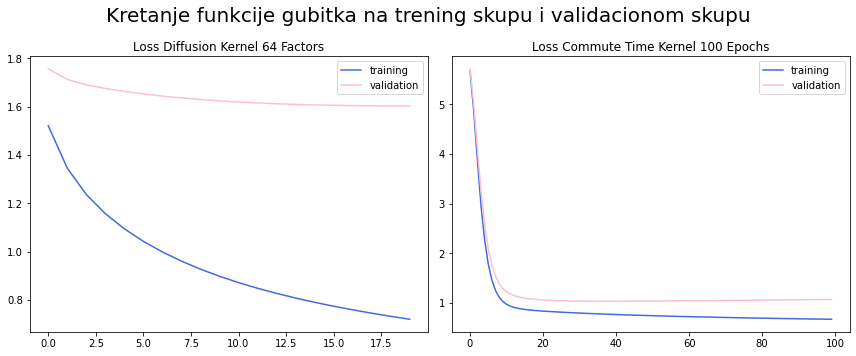

In [92]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Loss Diffusion Kernel 64 Factors')
plt.plot(np.arange(0, kpmf_model_dif_64factors.n_epochs), kpmf_model_dif_64factors.train_loss_per_epoch, label='training', 
        color='royalblue')
plt.plot(np.arange(0, kpmf_model_dif_64factors.n_epochs), kpmf_model_dif_64factors.val_loss_per_epoch, label='validation',
        color='pink')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Loss Commute Time Kernel 100 Epochs')
plt.plot(np.arange(0, kpmf_model_ct_100epochs.n_epochs), kpmf_model_ct_100epochs.train_loss_per_epoch, label='training',
        color='royalblue')
plt.plot(np.arange(0, kpmf_model_ct_100epochs.n_epochs), kpmf_model_ct_100epochs.val_loss_per_epoch, label='validation',
        color='pink')
plt.legend(loc='best')
plt.suptitle('Kretanje funkcije gubitka na trening skupu i validacionom skupu', fontsize=20)
plt.tight_layout()

plt.show()

In [76]:
# Predikcije dodatnih KPMF modela i greška na test skupu.
df_pred_kpmf_dif_64factors, pred_loss_kpmf_64factors = kpmf_model_dif_64factors.predict(df_user_artists_test)
df_pred_kpmf_dif_100epochs, pred_loss_kpmf_100epochs = kpmf_model_ct_100epochs.predict(df_user_artists_test)

Prikazujemo prvih 10 rejtinga i predikcija rejtinga za par korisnik/izvođač za svaki od dodatnih obučenih KPMF modela. 

In [77]:
df_pred_kpmf_dif_64factors.drop(columns = ['weight'])[1:10].style.set_caption("Predikcije dodatnog KPMF modela sa 64 latentna faktora")

,userID,artistID,rating,prediction
73070,1649,1034,6.792344,7.954155
51603,1149,193,2.708050,3.516289
64800,1459,604,5.010635,5.405886
12626,274,1072,5.214936,6.535525
5776,122,1244,2.708050,3.392735
80975,1829,67,5.869297,7.642127
64779,1458,2544,3.178054,5.777960
70429,1587,53,6.357842,6.390222
49392,1098,57,3.871201,2.824377


In [78]:
df_pred_kpmf_dif_100epochs.drop(columns = ['weight'])[1:10].style.set_caption("Predikcije dodatnog KPMF modela sa 100 epoha")

,userID,artistID,rating,prediction
73070,1649,1034,6.792344,7.601821
51603,1149,193,2.708050,2.521600
64800,1459,604,5.010635,4.615639
12626,274,1072,5.214936,4.657946
5776,122,1244,2.708050,2.828559
80975,1829,67,5.869297,7.152483
64779,1458,2544,3.178054,3.284715
70429,1587,53,6.357842,5.688448
49392,1098,57,3.871201,2.470608


Tabela koja prikazuje greške na trening, validacionom i test skupu dodatnih KPMF modela. 

In [79]:
initialized_data_additional = {'train_loss': [kpmf_model_dif_64factors.train_loss, kpmf_model_ct_100epochs.train_loss], 
                                'val_loss': [kpmf_model_dif_64factors.val_loss, kpmf_model_ct_100epochs.val_loss],
                                'test_loss': [pred_loss_kpmf_64factors, pred_loss_kpmf_100epochs]}
df_errors_kpmf_additional = pd.DataFrame(initialized_data_additional, index=['Diffusion 64 Factors', 'Commute Time 100 epochs'])
df_errors_kpmf_additional.style.set_caption("Greške dodatnih KPMF modela")

,train_loss,val_loss,test_loss
Diffusion 64 Factors,0.720675,1.602079,1.633006
Commute Time 100 epochs,0.673826,1.071209,1.064210


### Analiza rezultata dodatnih KPMF modela

<div style="text-align: justify"> 
Prethodno obučeni dodatni KPMF modeli ilustruju dva pomenuta zapažanja o metodi. Prvo se odnosi na broj latentnih faktora koji se koriste u modelu. Sa grafika kretanja greške na trening i validacionom skupu po epohama vidimo da se povećanjem broja faktora na 64 (u odnosu na prethodnih 8) greška na trening skupu smanjuje, dok je greška na skupu za validaciju velika i sporo opada. Dakle, u slučaju velikog broja latentnih faktora dolazi do preprilagođavanja modela podacima. To potvrđuje i tabela grešaka u kojoj vidimo da je greška na skupovima za validaciju i test dvostruko veća od greške na trening skupu, što potvrđuje zaključak da modeli sa velikim brojem latentnih faktora nisu pouzdani. <br>
Drugo zapažanje se odnosi na broj epoha korišćenih u modelu. Već u toku obučavanja modela sa 100 epoha, iz listi sa greškama po epohama koje se štampaju, možemo primijetiti da greške na trening i skupu za validaciju prvo opadaju, ali se potom stabilizuju, nakon čega greška na validacionom skupu počinje ponovo da raste. To možemo ilustrativno vidjeti i na grafiku kretanja greške na trening i validacionom skupu po epohama. 
I u ovom slučaju dolazi do preprilagođavanja modela podacima, greške na skupu za trening i validaciju odstupaju od greške na trening skupu, a dodatno, nakon određenog broja epoha (već nakon 30ak) model više ne napreduje sa učenjem, te kreće da se prilagođava podacima. <br>
Zaključujemo da su rezultati grid search-a u skladu sa rezultatima obučavanja modela i da pri izboru modela ne treba koristiti veliki broj latentnih faktora i veliki broj epoha.
</div>

### Obučavanje cKPMF modela

In [80]:
ckpmf_model = CKPMF(n_epochs=20, n_factors=8, learning_rate=0.005, regularization=0.01)

In [82]:
ckpmf_model.fit(df_user_artists_train, df_user_artists_val, df_user_friends, df_user_tagged_artists)

Obrada podataka...
Inicijalizacija u, v, y i w...
Ucenje...
Epoha 1:
train loss: 1.8313987688414006; val loss:1.860228127115658
Epoha 2:
train loss: 1.431991719486912; val loss:1.4666560946149423
Epoha 3:
train loss: 1.2632241703519214; val loss:1.3062687624038467
Epoha 4:
train loss: 1.1577142560456246; val loss:1.2075609836739822
Epoha 5:
train loss: 1.0847283527980371; val loss:1.1406378746666397
Epoha 6:
train loss: 1.0312129833960293; val loss:1.093016460612831
Epoha 7:
train loss: 0.9904156755180531; val loss:1.058129341351872
Epoha 8:
train loss: 0.9583576987202683; val loss:1.0320312806017764
Epoha 9:
train loss: 0.9324896820932409; val loss:1.0121795497539063
Epoha 10:
train loss: 0.9111054814668259; val loss:0.9968715666650286
Epoha 11:
train loss: 0.8930468918392817; val loss:0.984940076591844
Epoha 12:
train loss: 0.8775257875206431; val loss:0.9755684269685158
Epoha 13:
train loss: 0.8639985184147034; val loss:0.9681703223176947
Epoha 14:
train loss: 0.8520744895767959; va

In [83]:
save_model(ckpmf_model, 'models/ckpmf_final.sav')

### Grafički i tabelarni prikaz cKPMF modela

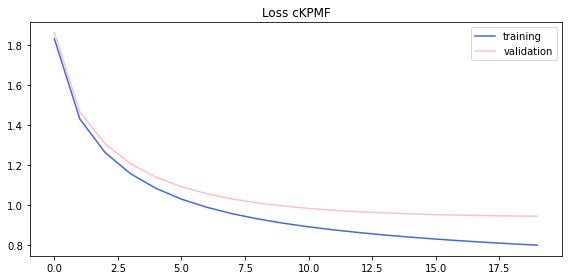

In [84]:
plt.figure(figsize=(8, 4))

plt.title('Loss cKPMF')
plt.plot(np.arange(0, ckpmf_model.n_epochs), ckpmf_model.train_loss_per_epoch, label='training', color='royalblue')
plt.plot(np.arange(0, ckpmf_model.n_epochs), ckpmf_model.val_loss_per_epoch, label='validation', color='pink')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [85]:
df_pred_ckpmf, pred_loss_ckpmf = ckpmf_model.predict(df_user_artists_test)

Prikazujemo prvih 10 rejtinga i predikcija rejtinga za par korisnik/izvođač za cKPMF model. 

In [86]:
df_pred_ckpmf.drop(columns=['weight'])[1:10].style.set_caption("Predikcije cKPMF modela")

,userID,artistID,rating,prediction
73070,1649,1034,6.792344,7.183461
51603,1149,193,2.708050,3.085956
64800,1459,604,5.010635,4.863375
12626,274,1072,5.214936,5.965631
5776,122,1244,2.708050,4.273837
80975,1829,67,5.869297,7.394585
64779,1458,2544,3.178054,3.151619
70429,1587,53,6.357842,6.601458
49392,1098,57,3.871201,3.256913


Tabela koja prikazuje greške na trening, validacionom i test skupu cKPMF i KPMF modela.

In [89]:
initialized_data_ckpmf = {'train_loss': [ckpmf_model.train_loss],
                          'val_loss': [ckpmf_model.val_loss],
                          'test_loss': [pred_loss_ckpmf]}
df_errors_all = pd.concat([df_errors_kpmf, pd.DataFrame(initialized_data_ckpmf, index=['cKPMF'])])     
df_errors_all.style.set_caption("Greške KPMF i cKPMF modela")

,train_loss,val_loss,test_loss
Commute Time,0.783598,1.082288,1.080920
Regularized Laplacian,0.710914,1.170802,1.148082
Diffusion,0.802066,0.959788,0.955862
RBF,0.794910,0.948088,0.951977
cKPMF,0.801364,0.945952,0.960231


### Analiza rezultata cKPMF modela i poređenje sa rezultatima KPMF modela

<div style="text-align: justify">  Na osnovu grafika kretanja greške cKPMF modela možemo zaključiti da je model stabilan, odnosno greške na skupu za trening i validaciju se prate i obje opadaju. Kod ovog modela nemamo nagli pad greške nakon malog broja epoha, već greška ravnomjerno opada po epohama. Iz prethodne tabele grešaka vidimo da cKMPF model ima malo veću grešku na skupu za trening i test od najboljeg KPMF modela (RBF model), a greška na skupu za validaciju im je približno ista. 
Kako je najbolji model u klasi KPMF modela (RBF model) veoma spor za obučavanje, preporučuje se cKPMF model. 
Iz tabela predikcija cKPMF modela vidimo da u većini slučajeva nema mnogo odstupanja između predikcija modela i stvarnih vrijednosti rejtinga. O pouzdanosti rezultata svjedoči mala greška na test skupu koja se ne razlikuje mnogo od greške na trening skupu. <br> 
</div>

### Zaključak

<div style="text-align: justify">
Konačan zaključak projekta jeste da uprkos većoj teorijskoj i implementacijskoj zahtjevnosti, rezultati cKPMF modela su približno isti kao rezultati RBF i Difuzionog KPMF modela koji su se u klasi KPMF modela pokazali kao najbolji, a vremenska zahtjevnost im je ista. Zaključujemo da se nametanje dodatnih uslova na latentnu matricu korisnika <em>U</em> u metodi cKPMF pokazalo veoma efikasnim za naš problem. <br>
Iz svega priloženog preporučuje se korišćenje metode cKPMF za predikciju rejtinga ukoliko su dostupne dodatne informacije o tagovima (žanrovima muzike) koje su korisnici dodijelili slušanim izvođačima. Sa druge strane, ukoliko nam je poznata i informacija o društvenoj mreži korisnika, onda je najbolje koristiti KPMF model sa RBF kernelom. Bilo bi nadalje zanimljivo istražiti kako bi se ponašao cKPMF model ukoliko bismo ga modifikovali tako da se u njega ugradi i informacija o društvenoj mreži korisnika, a ne samo informacija o dodijeljenim tagovima (žanrovima muzike).
</div>